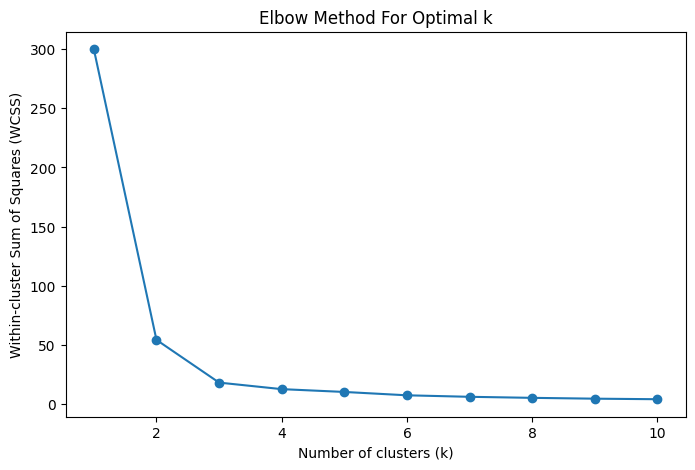

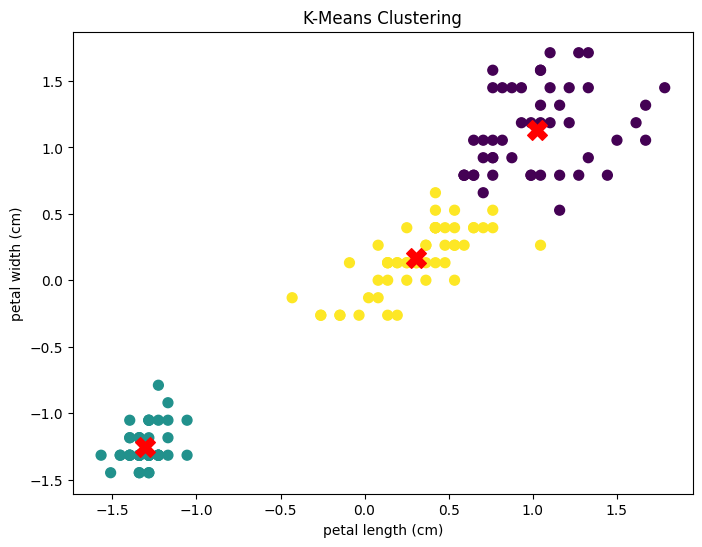

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

def load_iris_data():
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    return df

def preprocess_data(df, feature_cols):
    X = df[feature_cols].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def plot_elbow(X, max_k=10):
    wcss = []  # within-cluster sum of squares
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-cluster Sum of Squares (WCSS)')
    plt.title('Elbow Method For Optimal k')
    plt.show()

def apply_kmeans(X, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

def plot_clusters(X, kmeans, feature_names):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('K-Means Clustering')
    plt.show()

if __name__ == "__main__":
    # Load iris data
    data = load_iris_data()

    # Select two features (petal length and petal width)
    features = ['petal length (cm)', 'petal width (cm)']

    # Preprocess data (scaling)
    X_scaled = preprocess_data(data, features)

    # Plot Elbow Method
    plot_elbow(X_scaled, max_k=10)

    # Apply KMeans with k=3 (typical for iris dataset)
    kmeans_model = apply_kmeans(X_scaled, n_clusters=3)

    # Plot clusters
    plot_clusters(X_scaled, kmeans_model, features)
